In [1]:
import pandas as pd

In [4]:
pricedata = pd.read_csv('../data/price_ver_final.csv')

In [5]:
pricedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249906 entries, 0 to 3249905
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Date    object 
 1   Open    float64
 2   High    float64
 3   Low     float64
 4   Close   float64
 5   Volume  int64  
 6   종목코드    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 173.6+ MB


In [6]:
pricedata['종목코드'] = pricedata['종목코드'].astype(str).str.zfill(6)

In [10]:
pricedata['Date'] = pd.to_datetime(pricedata['Date'])

In [12]:
pricedata = pricedata.set_index('Date')

In [5]:
pricedata['종목코드'].unique()

array(['000020', '000040', '000050', ..., '139670', '143160', '145990'],
      dtype=object)

In [15]:
data_dt = pricedata[['Close']]
data_dt

,Close
Date,
2012-10-25,6340.0
2012-10-26,6200.0
2012-10-29,6270.0
2012-10-30,6390.0
2012-10-31,6500.0
...,...
2023-10-19,41350.0
2023-10-20,40600.0
2023-10-23,40500.0


In [16]:
from tqdm import tqdm

In [17]:
code_list = pricedata['종목코드'].unique().tolist()
reshape_df = pd.DataFrame()

for i in tqdm(code_list):
    reshape_df = pd.concat([reshape_df, pricedata[pricedata['종목코드']==i]],axis=1)


100%|██████████| 1201/1201 [06:47<00:00,  2.95it/s]


In [24]:
code_list

['000020',
 '000040',
 '000050',
 '000070',
 '000080',
 '000100',
 '000120',
 '000140',
 '000150',
 '000180',
 '000210',
 '000230',
 '000240',
 '000250',
 '000270',
 '000300',
 '000320',
 '000390',
 '000430',
 '000480',
 '000490',
 '000500',
 '000520',
 '000590',
 '000650',
 '000660',
 '000670',
 '000680',
 '000700',
 '000720',
 '000850',
 '000860',
 '000880',
 '000890',
 '000910',
 '000950',
 '000990',
 '001020',
 '001040',
 '001060',
 '001070',
 '001120',
 '001130',
 '001140',
 '001210',
 '001230',
 '001250',
 '001340',
 '001360',
 '001390',
 '001420',
 '001430',
 '001460',
 '001530',
 '001540',
 '001550',
 '001560',
 '001570',
 '001620',
 '001630',
 '001680',
 '001740',
 '001770',
 '001780',
 '001790',
 '001800',
 '001810',
 '001820',
 '001840',
 '001880',
 '001940',
 '002020',
 '002030',
 '002070',
 '002100',
 '002140',
 '002150',
 '002170',
 '002200',
 '002210',
 '002220',
 '002230',
 '002240',
 '002290',
 '002310',
 '002320',
 '002350',
 '002360',
 '002380',
 '002390',
 '002450',

In [27]:
close_df = reshape_df['Close']

In [28]:
close_df.columns = code_list

In [29]:
close_df

,000020,000040,000050,000070,000080,000100,000120,000140,000150,000180,...,137940,137950,138070,138490,138610,139050,139480,139670,143160,145990
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-25,6340.0,3445.0,7678.0,75000.0,28950.0,26369.0,111500.0,13900.0,104102.0,2453.0,...,1460.0,3920.0,4256.0,6657.0,4205.0,3766.0,239000.0,2491.0,20757.0,56900.0
2012-10-26,6200.0,3451.0,7678.0,72800.0,29200.0,25856.0,111000.0,13400.0,100485.0,2359.0,...,1430.0,3675.0,4226.0,6361.0,4123.0,3672.0,234500.0,2444.0,22562.0,55500.0
2012-10-29,6270.0,3366.0,7602.0,71900.0,30350.0,25560.0,114000.0,13650.0,101289.0,2291.0,...,1426.0,3644.0,4102.0,6265.0,3966.0,3353.0,240000.0,2335.0,21660.0,52200.0
2012-10-30,6390.0,3366.0,7602.0,69900.0,30950.0,26444.0,115000.0,13700.0,101289.0,2310.0,...,1418.0,3764.0,4154.0,6810.0,3916.0,3356.0,239500.0,2249.0,21627.0,51300.0
2012-10-31,6500.0,3372.0,7716.0,71500.0,32250.0,27770.0,113500.0,14000.0,101289.0,2350.0,...,1448.0,3729.0,4205.0,6743.0,3912.0,3443.0,236500.0,2249.0,22304.0,52800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-19,9630.0,602.0,8030.0,69200.0,21300.0,61400.0,78100.0,8590.0,78800.0,1799.0,...,387.0,7270.0,2715.0,7710.0,16030.0,6330.0,71900.0,4040.0,21800.0,41350.0
2023-10-20,9470.0,590.0,8010.0,69900.0,20650.0,62700.0,76000.0,8460.0,76300.0,1769.0,...,399.0,7080.0,2695.0,7250.0,15800.0,6050.0,70900.0,3835.0,21000.0,40600.0
2023-10-23,9470.0,564.0,7780.0,69300.0,20700.0,62000.0,74300.0,8450.0,75300.0,1784.0,...,389.0,6950.0,2650.0,7040.0,15340.0,6130.0,70900.0,3835.0,21000.0,40500.0


In [2]:
import bt

data = bt.get('AAPL', start='2010-01-01', end='2023-01-01')


[*********************100%%**********************]  1 of 1 completed


In [110]:
sma150 > sma252

,000020,000040,000050,000070,000080,000100,000120,000140,000150,000180,...,137940,137950,138070,138490,138610,139050,139480,139670,143160,145990
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-25,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-10-26,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-10-29,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-10-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-10-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-19,True,True,False,True,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True
2023-10-20,True,True,False,True,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True
2023-10-23,True,True,False,True,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True


In [113]:
# 조건1 : rebalancing 당일 종가가 이평선(252)보다 높은 종목코드.

sma252 = close_df.rolling(252).mean()
sma150 = close_df.rolling(150).mean()

# 조건2 : rebalancing 당일 종가가 최근 200일간 최고점 대비 25% 이상 낮지 않은 종목코드.
larger = close_df.rolling(200).max()

# 조건3 : rebalancing 당일 150이평선이 252이평선보다 높은 종목코드

# 신호 생성
signal = (close_df > sma252) & (close_df > larger * 0.85) & (sma150 > sma252)
signal

rebalance_dates = ['2013-04-01', '2014-04-01', '2015-04-01', '2016-03-31', '2017-04-03', 
                   '2018-04-02', '2019-04-01', '2020-04-01', '2021-04-01', '2022-04-01', '2023-04-03']


   # 리밸런싱일에 대한 신호만을 추출   
rebalance_signals = signal.reindex(rebalance_dates)

for i in range(0, 11):
    print(rebalance_signals.iloc[i, :].value_counts())

False    1201
Name: 2013-04-01, dtype: int64
False    858
True     343
Name: 2014-04-01, dtype: int64
False    782
True     419
Name: 2015-04-01, dtype: int64
False    1029
True      172
Name: 2016-03-31, dtype: int64
False    986
True     215
Name: 2017-04-03, dtype: int64
False    977
True     224
Name: 2018-04-02, dtype: int64
False    1102
True       99
Name: 2019-04-01, dtype: int64
False    1184
True       17
Name: 2020-04-01, dtype: int64
False    630
True     571
Name: 2021-04-01, dtype: int64
False    1096
True      105
Name: 2022-04-01, dtype: int64
False    1088
True      113
Name: 2023-04-03, dtype: int64


In [94]:
larger = close_df.rolling(200).max()
larger

,000020,000040,000050,000070,000080,000100,000120,000140,000150,000180,...,137940,137950,138070,138490,138610,139050,139480,139670,143160,145990
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-19,11070.0,853.0,11190.0,82500.0,27550.0,79900.0,94800.0,10260.0,149100.0,2275.0,...,664.0,8700.0,3460.0,10980.0,25100.0,8080.0,119000.0,11650.0,29900.0,53300.0
2023-10-20,11070.0,853.0,11190.0,82500.0,27550.0,79900.0,94800.0,10260.0,149100.0,2275.0,...,664.0,8700.0,3460.0,10980.0,25100.0,8080.0,119000.0,11650.0,29900.0,53300.0
2023-10-23,11070.0,853.0,11190.0,82500.0,26700.0,79900.0,94600.0,10260.0,149100.0,2275.0,...,664.0,8700.0,3460.0,10980.0,25100.0,8080.0,119000.0,11650.0,29900.0,53300.0


# 종가가 최고점 대비 몇 % 떨어지면 안된다
- 최근 n일동안의 최고점 대비 25%이상 낮으면 안된다.

In [56]:
# 전략 생성
def trend_following_strategy(data):
    # 200일 이동 평균 계산
    sma = data.rolling(252).mean()

    # 신호 생성
    signal = data > sma

    # 리밸런싱일 설정
    rebalance_dates = ['2013-04-01', '2014-04-01', '2015-04-01', '2016-03-31', '2017-04-03', 
                   '2018-04-02', '2020-04-01', '2021-04-01', '2022-04-01', '2023-04-03']


   # 리밸런싱일에 대한 신호만을 추출
    rebalance_signals = signal.reindex(rebalance_dates)

    return rebalance_signals


### 코드이상해서 일일이 넣어봄

In [38]:
sma = close_df[['000020']].rolling(200).mean()

In [46]:
sma

,000020
Date,
2012-10-25,NaN
2012-10-26,NaN
2012-10-29,NaN
2012-10-30,NaN
2012-10-31,NaN
...,...
2023-10-19,9498.20
2023-10-20,9497.25
2023-10-23,9496.55


In [51]:
signal = close_df[['000020']] > sma
signal

,000020
Date,
2012-10-25,False
2012-10-26,False
2012-10-29,False
2012-10-30,False
2012-10-31,False
...,...
2023-10-19,True
2023-10-20,False
2023-10-23,False


In [52]:
rebalance_dates = ['2013-04-01', '2014-04-01', '2015-04-01', '2016-03-31', '2017-04-03', 
                   '2018-04-02', '2020-04-01', '2021-04-01', '2022-04-01', '2023-04-03']


   # 리밸런싱일에 대한 신호만을 추출
rebalance_signals = signal.reindex(rebalance_dates)
rebalance_signals

,000020
Date,
2013-04-01,False
2014-04-01,False
2015-04-01,True
2016-03-31,True
2017-04-03,True
2018-04-02,True
2020-04-01,False
2021-04-01,False
2022-04-01,False


### 찐


<Axes: title={'center': 'Equity Progression'}>

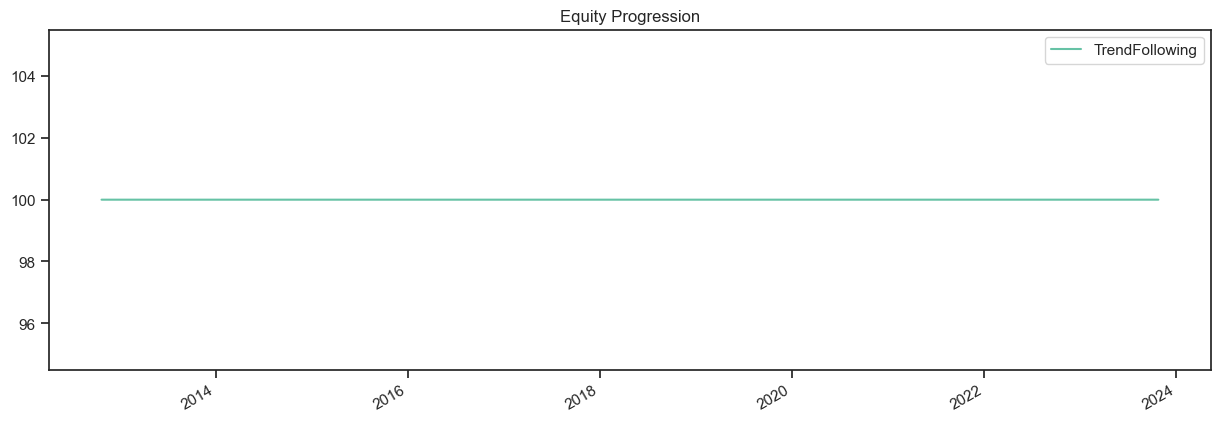

In [66]:
# rebalance_dates = ['2013-04-01', '2014-04-01', '2015-04-01', '2016-03-31', '2017-04-03', 
#                    '2018-04-02', '2020-04-01', '2021-04-01', '2022-04-01', '2023-04-03']


# 신호 생성
signal = trend_following_strategy(close_df)

# 전략에 따라 포트폴리오 생성
strategy = bt.Strategy('TrendFollowing', 
                       [
                            bt.algos.WeighTarget(signal),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()
                       ]
                       )

# 백테스트 실행
backtest = bt.Backtest(strategy, close_df)
result = bt.run(backtest)

# 결과 출력
result.plot()

In [64]:
# rebalance_dates = ['2013-04-01', '2014-04-01', '2015-04-01', '2016-03-31', '2017-04-03', 
#                    '2018-04-02', '2020-04-01', '2021-04-01', '2022-04-01', '2023-04-03']


# 신호 생성
signal = trend_following_strategy(close_df)

# 전략에 따라 포트폴리오 생성
strategy = bt.Strategy('TrendFollowing', 
                       [
                           bt.algos.SelectAll(),
                           bt.algos.SelectMomentum(n=5, lookback=pd.DateOffset(years=1)),
                           bt.algos.WeighERC(lookback=pd.DateOffset(year=1)),
                           bt.algos.Rebalance()
                       ]
                       )

# 백테스트 실행
backtest = bt.Backtest(strategy, close_df)
result = bt.run(backtest)

# 결과 출력
result.plot()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-10-25 00:00:00

In [62]:
result.display()

Stat                 TrendFollowing
-------------------  ----------------
Start                2012-10-24
End                  2023-10-25
Risk-free rate       0.00%

Total Return         9.44%
Daily Sharpe         1.20
Daily Sortino        2.09
CAGR                 0.82%
Max Drawdown         -2.00%
Calmar Ratio         0.41

MTD                  -0.10%
3m                   -0.16%
6m                   1.05%
YTD                  1.54%
1Y                   1.59%
3Y (ann.)            0.79%
5Y (ann.)            0.96%
10Y (ann.)           0.80%
Since Incep. (ann.)  0.82%

Daily Sharpe         1.20
Daily Sortino        2.09
Daily Mean (ann.)    0.84%
Daily Vol (ann.)     0.70%
Daily Skew           5.66
Daily Kurt           239.65
Best Day             1.15%
Worst Day            -0.82%

Monthly Sharpe       1.37
Monthly Sortino      3.38
Monthly Mean (ann.)  0.83%
Monthly Vol (ann.)   0.60%
Monthly Skew         1.91
Monthly Kurt         11.47
Best Month           1.10%
Worst Month          -0.4

c:\Users\User\anaconda3\Lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
c:\Users\User\anaconda3\Lib\site-packages\future\utils\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)


<Axes: title={'center': 'Equity Progression'}>

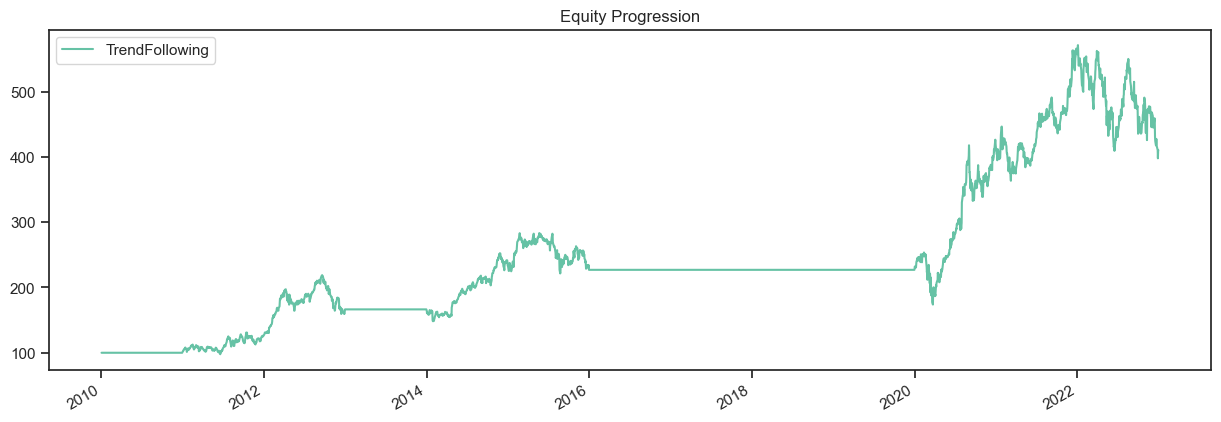

In [36]:
import bt
import pandas as pd

# 데이터 로드 (여기서는 Yahoo Finance의 데이터를 예로 들겠습니다.)
data = bt.get('AAPL', start='2010-01-01', end='2023-01-01')

# 전략 생성
def trend_following_strategy(data):
    # 200일 이동 평균 계산
    sma = data.rolling(200).mean()

    # 신호 생성
    signal = data > sma

    # 연간 리밸런싱을 위해 연말 데이터만 추출
    yearly_last = signal.resample('A').last()

    # 다음 해의 첫 거래일에 리밸런싱을 위해 시그널을 전달
    signal = signal.shift(-1).resample('D').ffill().reindex(yearly_last.index)

    return signal

# 신호 생성
signal = trend_following_strategy(data)

# 전략에 따라 포트폴리오 생성
strategy = bt.Strategy('TrendFollowing', 
                       algos=[
                           bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()
                       ])

# 백테스트 실행
backtest = bt.Backtest(strategy, data)
result = bt.run(backtest)

# 결과 출력
result.plot()